In [289]:
#import dependencies
import requests
import json
from fred_api_key import api_key 
import pandas as pd
import fredapi as fa
from dateutil import rrule
from datetime import date, datetime, timedelta
import calendar
fred = fa.Fred(api_key)
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy
from sklearn.metrics import r2_score

In [242]:
#read in csv file for cleaning
median_sale_price = 'Resources/median sale price.csv'
median_sale_price = pd.read_csv(median_sale_price)

In [243]:
#look at df 
median_sale_price.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,8/31/2018,9/30/2018,10/31/2018,11/30/2018,12/31/2018,...,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023
0,102001,0,United States,country,NaN,234730.0,234204.0,234463.0,235793.0,236051.0,...,347712.0,354759.0,357096.0,353337.0,347545.0,343106.0,340474.0,337433.0,333395.0,330963
1,394913,1,"New York, NY",msa,NY,400544.0,406886.0,405333.0,408229.0,400611.0,...,530064.0,537957.0,545143.0,551160.0,557161.0,554162.0,545334.0,535995.0,531301.0,528584
2,753899,2,"Los Angeles, CA",msa,CA,631226.0,627691.0,629338.0,630193.0,628718.0,...,891677.0,904875.0,903309.0,886535.0,871617.0,859954.0,856337.0,849322.0,840678.0,835434
3,394463,3,"Chicago, IL",msa,IL,223621.0,222898.0,223829.0,227846.0,229560.0,...,288628.0,290468.0,294768.0,295454.0,294196.0,290457.0,287437.0,286443.0,286682.0,286914
4,394514,4,"Dallas, TX",msa,TX,259950.0,255109.0,253399.0,253805.0,254198.0,...,388741.0,403062.0,412268.0,410701.0,404747.0,396723.0,391805.0,387637.0,381228.0,375177


In [258]:
# dropped unwanted columns = median_sale_price.drop(columns= ['RegionType', 'RegionID', 'StateName']), renamed df
median_sale_price_cleaned = median_sale_price.copy()
median_sale_price_cleaned = median_sale_price_cleaned.drop(columns= ['SizeRank'])
median_sale_price_cleaned


,RegionName,8/31/2018,9/30/2018,10/31/2018,11/30/2018,12/31/2018,1/31/2019,2/28/2019,3/31/2019,4/30/2019,...,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023
0,United States,234730.0,234204.0,234463.0,235793.0,236051.0,237189.0,237591.0,240356.0,242432.0,...,347712.0,354759.0,357096.0,353337.0,347545.0,343106.0,340474.0,337433.0,333395.0,330963
1,"New York, NY",400544.0,406886.0,405333.0,408229.0,400611.0,401382.0,400577.0,401650.0,401362.0,...,530064.0,537957.0,545143.0,551160.0,557161.0,554162.0,545334.0,535995.0,531301.0,528584
2,"Los Angeles, CA",631226.0,627691.0,629338.0,630193.0,628718.0,624524.0,621848.0,625020.0,628934.0,...,891677.0,904875.0,903309.0,886535.0,871617.0,859954.0,856337.0,849322.0,840678.0,835434
3,"Chicago, IL",223621.0,222898.0,223829.0,227846.0,229560.0,230611.0,233522.0,236514.0,237164.0,...,288628.0,290468.0,294768.0,295454.0,294196.0,290457.0,287437.0,286443.0,286682.0,286914
4,"Dallas, TX",259950.0,255109.0,253399.0,253805.0,254198.0,253403.0,253775.0,255327.0,257809.0,...,388741.0,403062.0,412268.0,410701.0,404747.0,396723.0,391805.0,387637.0,381228.0,375177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,"Fort Morgan, CO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,292585
520,"Weatherford, OK",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,178966.0,172452.0,168885.0,154141.0,151463.0,155313.0,156758.0,141539.0,141632.0,119269
521,"Alpena, MI",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,144756.0,149242.0,149847.0,152389.0,156748.0,156326.0,151989.0,143070.0,142780.0,141544
522,"Toccoa, GA",133240.0,134394.0,122712.0,117533.0,107772.0,113509.0,125356.0,122209.0,126939.0,...,204551.0,202703.0,210223.0,205026.0,204263.0,197087.0,196088.0,187996.0,192815.0,208645


In [259]:
median_sale_price_cleaned_25 = median_sale_price_cleaned.loc[(median_sale_price_cleaned.index<26),:]
median_sale_price_cleaned_25

,RegionName,8/31/2018,9/30/2018,10/31/2018,11/30/2018,12/31/2018,1/31/2019,2/28/2019,3/31/2019,4/30/2019,...,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023
0,United States,234730.0,234204.0,234463.0,235793.0,236051.0,237189.0,237591.0,240356.0,242432.0,...,347712.0,354759.0,357096.0,353337.0,347545.0,343106.0,340474.0,337433.0,333395.0,330963
1,"New York, NY",400544.0,406886.0,405333.0,408229.0,400611.0,401382.0,400577.0,401650.0,401362.0,...,530064.0,537957.0,545143.0,551160.0,557161.0,554162.0,545334.0,535995.0,531301.0,528584
2,"Los Angeles, CA",631226.0,627691.0,629338.0,630193.0,628718.0,624524.0,621848.0,625020.0,628934.0,...,891677.0,904875.0,903309.0,886535.0,871617.0,859954.0,856337.0,849322.0,840678.0,835434
3,"Chicago, IL",223621.0,222898.0,223829.0,227846.0,229560.0,230611.0,233522.0,236514.0,237164.0,...,288628.0,290468.0,294768.0,295454.0,294196.0,290457.0,287437.0,286443.0,286682.0,286914
4,"Dallas, TX",259950.0,255109.0,253399.0,253805.0,254198.0,253403.0,253775.0,255327.0,257809.0,...,388741.0,403062.0,412268.0,410701.0,404747.0,396723.0,391805.0,387637.0,381228.0,375177
5,"Houston, TX",221270.0,220449.0,220679.0,221628.0,222783.0,222752.0,224113.0,225808.0,227081.0,...,323493.0,329674.0,334747.0,336019.0,330946.0,327666.0,323361.0,320765.0,315651.0,313690
6,"Washington, DC",385264.0,384470.0,385907.0,386526.0,390446.0,393540.0,396652.0,399836.0,399924.0,...,492196.0,506356.0,511189.0,506821.0,499513.0,493312.0,491595.0,491614.0,484960.0,477182
7,"Miami, FL",262640.0,262100.0,265882.0,269781.0,271295.0,271013.0,270494.0,275337.0,277490.0,...,397800.0,406140.0,411027.0,414376.0,412037.0,411279.0,414988.0,416303.0,417066.0,416790
8,"Philadelphia, PA",228012.0,228818.0,229154.0,230828.0,231552.0,234055.0,233877.0,237063.0,238637.0,...,297838.0,304701.0,314598.0,320271.0,319425.0,318140.0,317783.0,317197.0,317316.0,316064
9,"Atlanta, GA",223112.0,224875.0,228402.0,231187.0,230909.0,230142.0,230847.0,233430.0,234124.0,...,356674.0,364393.0,371609.0,374745.0,374322.0,371643.0,368126.0,362917.0,359244.0,354583


In [260]:

median_sale_price_cleaned = median_sale_price_cleaned.set_index('RegionName')
median_sale_price_cleaned

,8/31/2018,9/30/2018,10/31/2018,11/30/2018,12/31/2018,1/31/2019,2/28/2019,3/31/2019,4/30/2019,5/31/2019,...,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023
RegionName,,,,,,,,,,,,,,,,,,,,,
United States,234730.0,234204.0,234463.0,235793.0,236051.0,237189.0,237591.0,240356.0,242432.0,244478.0,...,347712.0,354759.0,357096.0,353337.0,347545.0,343106.0,340474.0,337433.0,333395.0,330963
"New York, NY",400544.0,406886.0,405333.0,408229.0,400611.0,401382.0,400577.0,401650.0,401362.0,400485.0,...,530064.0,537957.0,545143.0,551160.0,557161.0,554162.0,545334.0,535995.0,531301.0,528584
"Los Angeles, CA",631226.0,627691.0,629338.0,630193.0,628718.0,624524.0,621848.0,625020.0,628934.0,629119.0,...,891677.0,904875.0,903309.0,886535.0,871617.0,859954.0,856337.0,849322.0,840678.0,835434
"Chicago, IL",223621.0,222898.0,223829.0,227846.0,229560.0,230611.0,233522.0,236514.0,237164.0,235628.0,...,288628.0,290468.0,294768.0,295454.0,294196.0,290457.0,287437.0,286443.0,286682.0,286914
"Dallas, TX",259950.0,255109.0,253399.0,253805.0,254198.0,253403.0,253775.0,255327.0,257809.0,261591.0,...,388741.0,403062.0,412268.0,410701.0,404747.0,396723.0,391805.0,387637.0,381228.0,375177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Fort Morgan, CO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,292585
"Weatherford, OK",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,178966.0,172452.0,168885.0,154141.0,151463.0,155313.0,156758.0,141539.0,141632.0,119269
"Alpena, MI",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,144756.0,149242.0,149847.0,152389.0,156748.0,156326.0,151989.0,143070.0,142780.0,141544


In [181]:

# median_sale_price_us = median_sale_price_cleaned.loc['United States']
# median_sale_price_us_df = pd.DataFrame(median_sale_price_us)
# median_sale_price_us_df

# mortgage_rate_30=mortgage_rate_30_df.reset_index(inplace=True)
# mortgage_rate_30_df.columns =['Date','Average Rate']


In [182]:
# reset index to 'SizeRank'
# median_sale_price_cleaned.set_index('SizeRank', inplace=True)
# median_sale_price_cleaned


In [183]:
# transposed_median_sale_price = median_sale_price_cleaned.T
# transposed_median_sale_price

In [184]:
#write to csv file
median_sale_price_cleaned.to_csv("median_sale_price_cleaned.csv", index=False)

In [185]:
#base url for FRED api
base_url ="https://api.stlouisfed.org/fred/series?file_type=json&api_key=" + api_key

In [186]:
#url for Mortgate rate
id_url = "https://api.stlouisfed.org/fred/series?series_id=MORTGAGE30US&file_type=json&api_key=" + api_key

#add time series to filter unwanted dates
query_url = "https://api.stlouisfed.org/fred/series?series_id=MORTGAGE30US&file_type=json&api_key=" + api_key +"&realtime_start=2018-08-31&realtime_end=2023-01-31"


response = requests.get(query_url)
response_data = response.json()
print(json.dumps(response_data, indent=4, sort_keys=False))

{
    "realtime_start": "2018-08-31",
    "realtime_end": "2023-01-31",
    "seriess": [
        {
            "id": "MORTGAGE30US",
            "realtime_start": "2018-08-31",
            "realtime_end": "2022-11-16",
            "title": "30-Year Fixed Rate Mortgage Average in the United States",
            "observation_start": "1971-04-02",
            "observation_end": "2022-11-10",
            "frequency": "Weekly, Ending Thursday",
            "frequency_short": "W",
            "units": "Percent",
            "units_short": "%",
            "seasonal_adjustment": "Not Seasonally Adjusted",
            "seasonal_adjustment_short": "NSA",
            "last_updated": "2022-11-10 11:01:03-06",
            "popularity": 99,
            "notes": "Data is provided \"as is,\" by Freddie Mac\u00ae with no warranties of any kind, express or implied, including, but not limited to, warranties of accuracy or implied warranties of merchantability or fitness for a particular purpose. Use of 

In [187]:
mortgage_30_yr = fred.get_series('MORTGAGE30US')
mortgage_30_yr.name = 'mortgage_30_yr'
mortgage_30_yr.tail()


2023-03-02    6.65
2023-03-09    6.73
2023-03-16    6.60
2023-03-23    6.42
2023-03-30    6.32
Name: mortgage_30_yr, dtype: float64

In [188]:
mortgage_rate_30_df = pd.DataFrame(mortgage_30_yr)
mortgage_rate_30_df

,mortgage_30_yr
1971-04-02,7.33
1971-04-09,7.31
1971-04-16,7.31
1971-04-23,7.31
1971-04-30,7.29
...,...
2023-03-02,6.65
2023-03-09,6.73
2023-03-16,6.60
2023-03-23,6.42


In [189]:
#reset index
mortgage_rate_30=mortgage_rate_30_df.reset_index(inplace=True)
mortgage_rate_30_df


,index,mortgage_30_yr
0,1971-04-02,7.33
1,1971-04-09,7.31
2,1971-04-16,7.31
3,1971-04-23,7.31
4,1971-04-30,7.29
...,...,...
2709,2023-03-02,6.65
2710,2023-03-09,6.73
2711,2023-03-16,6.60
2712,2023-03-23,6.42


In [190]:
#rename colums
mortgage_rate_30_df.columns =['Date','Average Rate']
mortgage_rate_30_df

,Date,Average Rate
0,1971-04-02,7.33
1,1971-04-09,7.31
2,1971-04-16,7.31
3,1971-04-23,7.31
4,1971-04-30,7.29
...,...,...
2709,2023-03-02,6.65
2710,2023-03-09,6.73
2711,2023-03-16,6.60
2712,2023-03-23,6.42


In [191]:
#filter date range to match other dataset
mortgage_rate_30_df = mortgage_rate_30_df.query("Date > '2018-07-31' and Date < '2023-02-01'")
mortgage_rate_30_df

,Date,Average Rate
2470,2018-08-02,4.60
2471,2018-08-09,4.59
2472,2018-08-16,4.53
2473,2018-08-23,4.51
2474,2018-08-30,4.52
...,...,...
2700,2022-12-29,6.42
2701,2023-01-05,6.48
2702,2023-01-12,6.33
2703,2023-01-19,6.15


In [192]:
#add columns for month & year
mortgage_rate_30_df['Month'] = mortgage_rate_30_df['Date'].dt.month
mortgage_rate_30_df['Year'] = mortgage_rate_30_df['Date'].dt.year
mortgage_rate_30_df

C:\Users\User\AppData\Local\Temp\ipykernel_21488\1428994773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mortgage_rate_30_df['Month'] = mortgage_rate_30_df['Date'].dt.month
C:\Users\User\AppData\Local\Temp\ipykernel_21488\1428994773.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mortgage_rate_30_df['Year'] = mortgage_rate_30_df['Date'].dt.year


,Date,Average Rate,Month,Year
2470,2018-08-02,4.60,8,2018
2471,2018-08-09,4.59,8,2018
2472,2018-08-16,4.53,8,2018
2473,2018-08-23,4.51,8,2018
2474,2018-08-30,4.52,8,2018
...,...,...,...,...
2700,2022-12-29,6.42,12,2022
2701,2023-01-05,6.48,1,2023
2702,2023-01-12,6.33,1,2023
2703,2023-01-19,6.15,1,2023


In [193]:
# average_mortgage_rate = mortgage_rate_30_df.groupby(['Year','Month']).mean()['Average Rate']
# average_mortgage_rate

In [194]:
#get the averagae mortgage rate per month & year
average_mortgage_rate = mortgage_rate_30_df.groupby(['Year','Month'], as_index=False).mean()
average_mortgage_rate

,Year,Month,Average Rate
0,2018,8,4.5500
1,2018,9,4.6275
2,2018,10,4.8300
3,2018,11,4.8660
4,2018,12,4.6375
5,2019,1,4.4640
6,2019,2,4.3700
7,2019,3,4.2650
8,2019,4,4.1425
9,2019,5,4.0720


In [195]:
#save cleaned dataframe to csv
average_mortgage_rate.to_csv("average_mortgage_rate.csv", index=False)

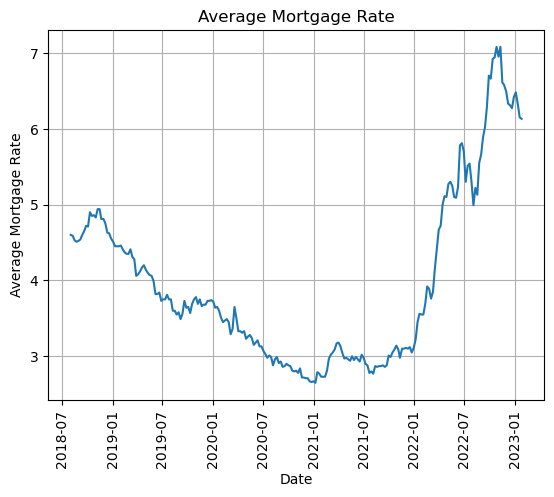

In [222]:
x_value = mortgage_rate_30_df['Date']
y_value = mortgage_rate_30_df['Average Rate']

plt.plot(x_value, y_value)
plt.xlabel("Date")
plt.ylabel("Average Mortgage Rate")
plt.grid()
plt.title("Average Mortgage Rate")
plt.xticks(rotation='vertical')
plt.savefig("AverageMortgageRate5Year.png")


In [197]:
prime_loan_rate = fred.get_series('PRIME')
prime_loan_rate.name = 'prime rate'
prime_loan_rate.tail()

2022-09-22    6.25
2022-11-03    7.00
2022-12-15    7.50
2023-02-02    7.75
2023-03-23    8.00
Name: prime rate, dtype: float64

In [198]:
prime_loan_rate_df = pd.DataFrame(prime_loan_rate)
prime_loan_rate_df

,prime rate
1947-12-01,NaN
1948-08-01,NaN
1950-09-22,NaN
1951-01-08,NaN
1951-10-17,NaN
...,...
2022-09-22,6.25
2022-11-03,7.00
2022-12-15,7.50
2023-02-02,7.75


In [199]:
prime_loan_rate_df.reset_index(inplace=True)
prime_loan_rate_df

,index,prime rate
0,1947-12-01,NaN
1,1948-08-01,NaN
2,1950-09-22,NaN
3,1951-01-08,NaN
4,1951-10-17,NaN
...,...,...
359,2022-09-22,6.25
360,2022-11-03,7.00
361,2022-12-15,7.50
362,2023-02-02,7.75


In [200]:
#rename columns
prime_loan_rate_df.columns =['Date','Prime Rate']
prime_loan_rate_df

,Date,Prime Rate
0,1947-12-01,NaN
1,1948-08-01,NaN
2,1950-09-22,NaN
3,1951-01-08,NaN
4,1951-10-17,NaN
...,...,...
359,2022-09-22,6.25
360,2022-11-03,7.00
361,2022-12-15,7.50
362,2023-02-02,7.75


In [221]:
#filter date range to match other dataset
prime_loan_rate_df = prime_loan_rate_df.query("Date > '2018-07-31' and Date < '2023-02-01'")
prime_loan_rate_df

,Date,Prime Rate
348,2018-09-27,5.25
349,2018-12-20,5.50
350,2019-08-01,5.25
351,2019-09-19,5.00
352,2019-10-31,4.75
353,2020-03-04,4.25
354,2020-03-16,3.25
355,2022-03-17,3.50
356,2022-05-05,4.00
357,2022-06-16,4.75


In [224]:
average_prime_rate = prime_loan_rate_df.groupby(['Date'], as_index=False)#.mean()
average_prime_rate

(array([17897., 18078., 18262., 18444., 18628., 18809., 18993., 19174.,
        19358.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

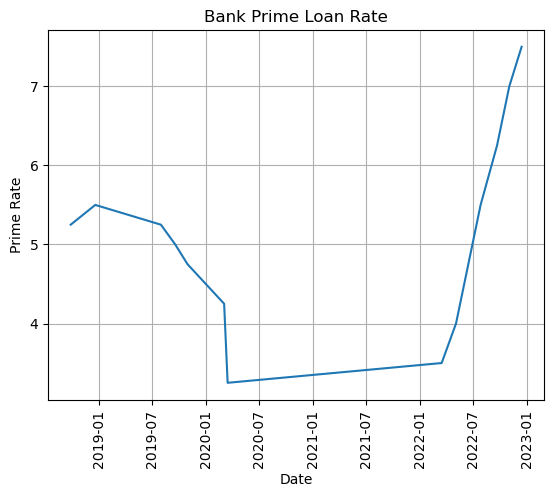

In [ ]:
x_value = prime_loan_rate_df['Date']
y_value = prime_loan_rate_df['Prime Rate']

plt.plot(x_value, y_value)
plt.xlabel("Date")
plt.ylabel("Prime Rate")
plt.grid()
plt.title("Bank Prime Loan Rate")
plt.xticks(rotation='vertical')



In [ ]:
#add columns for month & year
prime_loan_rate_df['Month'] = prime_loan_rate_df['Date'].dt.month
prime_loan_rate_df['Year'] = prime_loan_rate_df['Date'].dt.year
prime_loan_rate_df

,index,Date,Prime Rate,Month,Year
0,348,2018-09-27,5.25,9,2018
1,349,2018-12-20,5.50,12,2018
2,350,2019-08-01,5.25,8,2019
3,351,2019-09-19,5.00,9,2019
4,352,2019-10-31,4.75,10,2019
5,353,2020-03-04,4.25,3,2020
6,354,2020-03-16,3.25,3,2020
7,355,2022-03-17,3.50,3,2022
8,356,2022-05-05,4.00,5,2022
9,357,2022-06-16,4.75,6,2022


In [ ]:
# can I merge average mortgage rate and prime rate
merged_rates = pd.merge(prime_loan_rate_df,average_mortgage_rate, how='outer', on = 'Month', suffixes = ('_left', '_right'))
merged_rates.sort_values("Date", inplace=True)
merged_rates


,index,Date,Prime Rate,Month,Year,Average Rate
0,348.0,2018-09-27,5.25,9,2018.0,4.6275
1,348.0,2018-09-27,5.25,9,2018.0,3.6050
2,348.0,2018-09-27,5.25,9,2018.0,2.8900
3,348.0,2018-09-27,5.25,9,2018.0,2.9000
4,348.0,2018-09-27,5.25,9,2018.0,6.1120
...,...,...,...,...,...,...
72,NaN,NaT,NaN,2,NaN,3.7625
73,NaN,NaT,NaN,4,NaN,4.1425
74,NaN,NaT,NaN,4,NaN,3.3060
75,NaN,NaT,NaN,4,NaN,3.0600


<AxesSubplot:xlabel='Date'>

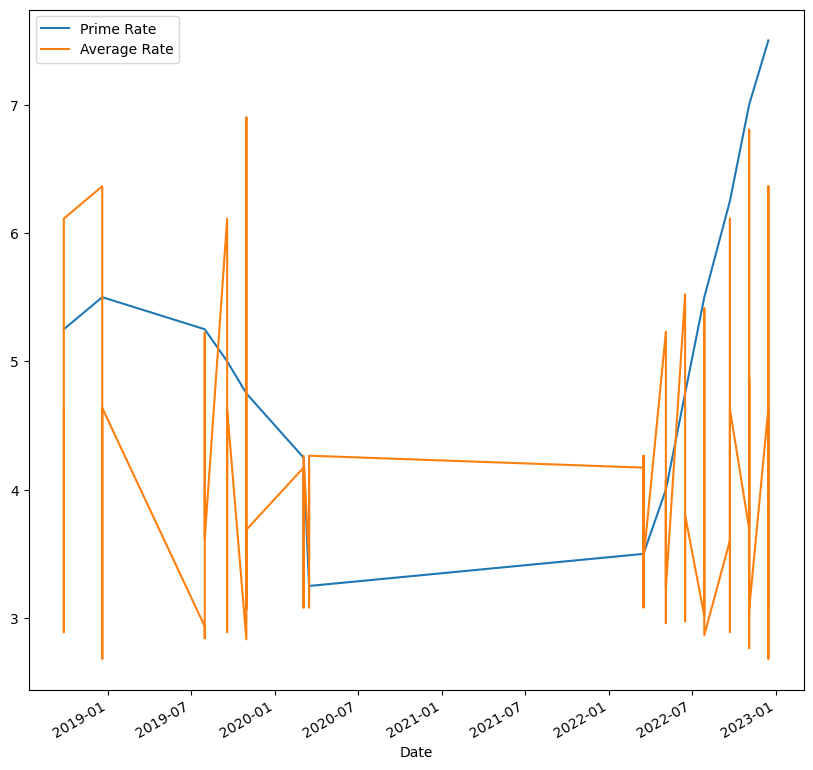

In [209]:
merged_rates.plot(x="Date", y=["Prime Rate", "Average Rate"], kind='line', figsize=(10, 10))


In [ ]:
#plot prime loan rate and average mortgage rate multi-line plot
prime_loan_rate_df = prime_loan_rate_df.loc['Prime Rate']
prime_loan_rate_df=prime_loan_rate_df.astype(float)
average_mortgage_rate_us = average_mortgage_rate.loc['Average Rate']
average_mortgage_rate_us=average_mortgage_rate_us.astype(float)



date = average_mortgage_rate_us.keys()

plt.figure(figsize=(800,800))

fig, ax = plt.subplots()
#fig.subplots_adjust(right=0.75)
twin1 = ax.twinx()

prime_rate_plot, = ax.plot(date, prime_loan_rate_df, color="blue", label="Bank Prime Loan Rate US")
mortgage_rate_plot, = twin1.plot(date, average_mortgage_rate_us, color="green", label="Average Mortgage Rates US")

# ax.set_xlim(0, 2)
# ax.set_ylim(0,2)
# twin1.set_ylim(0,4)

ax.set_xlabel('Date')
ax.set_ylabel('Bank Prime Loan Rates US')
twin1.set_ylabel("Average Mortgage Rates US")

ax.legend(handles = [prime_rate_plot, mortgage_rate_plot])
ax.set_xticklabels(ax.get_xticks(), rotation = 90)
plt.show()

KeyError: 'Prime Rate'

The r-value is:0.09995857775196289


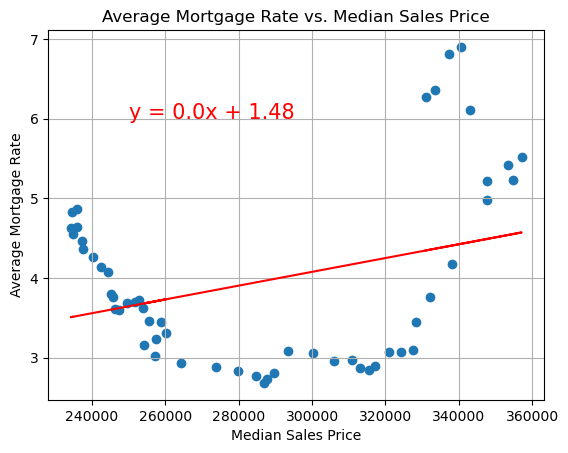

In [ ]:

x_val=median_sale_price_cleaned.loc['United States']
x_value=x_val.astype(float)
y_val=average_mortgage_rate['Average Rate']
y_value=y_val.astype(float)

#plot data

plt.scatter(x_value, y_value)
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_value, y_value)
median_sales_price_avg_morg_rate=x_value*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,median_sales_price_avg_morg_rate,"r-")
plt.annotate(line_eq,(250000,6),fontsize=15,color="red")
plt.xlabel("Median Sales Price")
plt.ylabel("Average Mortgage Rate")
plt.grid()
plt.title("Average Mortgage Rate vs. Median Sales Price")
print(f'The r-value is:{rvalue*rvalue}')
#plt.savefig("MortgageRatevsMedianPrice.png")



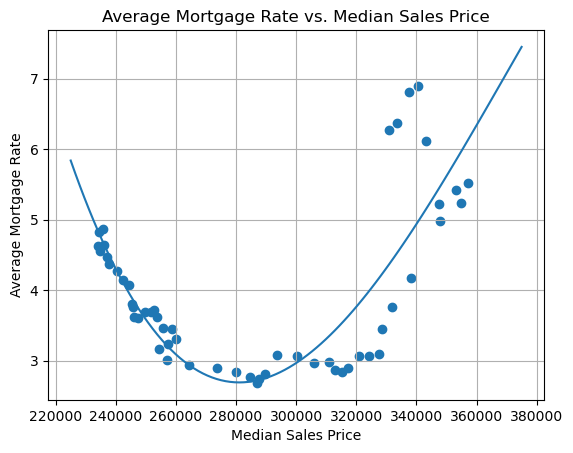

The r-value is: 0.6504054905545298


In [291]:
#set x & y values 
x_val=median_sale_price_cleaned.loc['United States']
y_val=average_mortgage_rate['Average Rate']

#polynomial regression equation
poly_reg = numpy.poly1d(numpy.polyfit(x_val, y_val, 3))
poly_line = numpy.linspace(225000, 375000, 100)

plt.scatter(x_val, y_val)
plt.plot(poly_line, poly_reg(poly_line))
plt.xlabel("Median Sales Price")
plt.ylabel("Average Mortgage Rate")
plt.grid()
plt.title("Average Mortgage Rate vs. Median Sales Price")
plt.savefig("MortgageRatevsMedianPricePolynomial.png")
plt.show()
print(f'The r-value is: {r2_score(y_val, poly_reg(x_val))}')


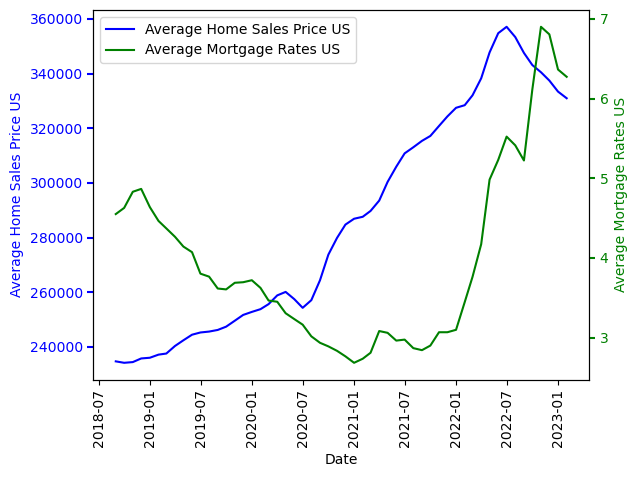

In [261]:
#plot median us sales price and average mortgage rate multi-line plot
#set x,y values
average_sales_price_us = median_sale_price_cleaned.loc['United States']
average_sales_price_us = average_sales_price_us.astype(float)

average_mortgage_rate_us = average_mortgage_rate['Average Rate']
average_mortgage_rate_us = average_mortgage_rate_us.astype(float)

date = median_sale_price_cleaned.keys()
date_2 = pd.to_datetime(date)

#plot figure with ax subplots for multi y-axis
fig, ax = plt.subplots()
twin1 = ax.twinx()

sales_price_plot, = ax.plot(date_2, average_sales_price_us, color="blue", label="Average Home Sales Price US")
mortgage_rate_plot, = twin1.plot(date_2, average_mortgage_rate_us, color="green", label="Average Mortgage Rates US")

#set tick labels, colors, rotation
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=sales_price_plot.get_color(), **tkw)
twin1.tick_params(axis='y', colors=mortgage_rate_plot.get_color(), **tkw)

ax.yaxis.label.set_color(sales_price_plot.get_color())
twin1.yaxis.label.set_color(mortgage_rate_plot.get_color())    

#set labels
ax.set_xlabel('Date')
ax.set_ylabel('Average Home Sales Price US')
twin1.set_ylabel("Average Mortgage Rates US")

#set legend
ax.legend(handles = [sales_price_plot, mortgage_rate_plot])

# Save the figure
plt.savefig("AverageSalesPrice_AverageMortgageRate.png")

#show plot
plt.show()



In [262]:
# median_sale_price_cleaned_25=median_sale_price_cleaned.loc[(median_sale_price_cleaned.index<26),:]
# median_sale_price_cleaned_25
median_sale_price_cleaned
#median_sale_price_cleaned_25

,8/31/2018,9/30/2018,10/31/2018,11/30/2018,12/31/2018,1/31/2019,2/28/2019,3/31/2019,4/30/2019,5/31/2019,...,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023
RegionName,,,,,,,,,,,,,,,,,,,,,
United States,234730.0,234204.0,234463.0,235793.0,236051.0,237189.0,237591.0,240356.0,242432.0,244478.0,...,347712.0,354759.0,357096.0,353337.0,347545.0,343106.0,340474.0,337433.0,333395.0,330963
"New York, NY",400544.0,406886.0,405333.0,408229.0,400611.0,401382.0,400577.0,401650.0,401362.0,400485.0,...,530064.0,537957.0,545143.0,551160.0,557161.0,554162.0,545334.0,535995.0,531301.0,528584
"Los Angeles, CA",631226.0,627691.0,629338.0,630193.0,628718.0,624524.0,621848.0,625020.0,628934.0,629119.0,...,891677.0,904875.0,903309.0,886535.0,871617.0,859954.0,856337.0,849322.0,840678.0,835434
"Chicago, IL",223621.0,222898.0,223829.0,227846.0,229560.0,230611.0,233522.0,236514.0,237164.0,235628.0,...,288628.0,290468.0,294768.0,295454.0,294196.0,290457.0,287437.0,286443.0,286682.0,286914
"Dallas, TX",259950.0,255109.0,253399.0,253805.0,254198.0,253403.0,253775.0,255327.0,257809.0,261591.0,...,388741.0,403062.0,412268.0,410701.0,404747.0,396723.0,391805.0,387637.0,381228.0,375177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Fort Morgan, CO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,292585
"Weatherford, OK",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,178966.0,172452.0,168885.0,154141.0,151463.0,155313.0,156758.0,141539.0,141632.0,119269
"Alpena, MI",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,144756.0,149242.0,149847.0,152389.0,156748.0,156326.0,151989.0,143070.0,142780.0,141544


In [237]:
csv_path = "csv files/bc_Top 25 For Sale Inventory.csv"

inventory_csv_df = pd.read_csv(csv_path)

In [264]:
inventory_csv_df_cleaned = inventory_csv_df.drop(columns= ['SizeRank'])
inventory_csv_df_cleaned = inventory_csv_df_cleaned.set_index('RegionName')
inventory_csv_df_cleaned


# median_sale_price_cleaned = median_sale_price_cleaned.drop(columns= ['SizeRank'])
# median_sale_price_cleaned
# median_sale_price_cleaned = median_sale_price_cleaned.set_index('RegionName')
# median_sale_price_cleaned


,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,...,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31
RegionName,,,,,,,,,,,,,,,,,,,,,
United States,1733388.0,1723097.0,1701371.0,1642145.0,1541994.0,1452603.0,1405515.0,1449965.0,1515570.0,1604227.0,...,774472.0,860326.0,946905.0,1033311.0,1092069.0,1101482.0,1085079.0,1032570.0,955889.0,884119.0
"New York, NY",91252.0,90050.0,89339.0,87186.0,81944.0,76678.0,74497.0,78192.0,84211.0,91255.0,...,51340.0,55710.0,58872.0,61312.0,61386.0,60262.0,58241.0,55450.0,50400.0,45916.0
"Los Angeles, CA",29874.0,30428.0,30606.0,30035.0,28252.0,26635.0,25849.0,27132.0,28454.0,30124.0,...,16023.0,17635.0,19187.0,21015.0,22264.0,22400.0,21802.0,20477.0,18604.0,16766.0
"Chicago, IL",49782.0,49630.0,48916.0,46495.0,42304.0,38250.0,36754.0,39387.0,43789.0,48113.0,...,24246.0,26775.0,28894.0,30846.0,31876.0,31682.0,30798.0,28771.0,25674.0,22770.0
"Dallas, TX",33567.0,33512.0,32589.0,31265.0,29283.0,27727.0,27057.0,28543.0,30513.0,32932.0,...,15053.0,16146.0,17845.0,20485.0,22365.0,22863.0,22445.0,21500.0,19985.0,18560.0
"Houston, TX",32911.0,32423.0,31475.0,30059.0,28517.0,27451.0,27492.0,29072.0,30727.0,32388.0,...,17175.0,18420.0,19852.0,21624.0,23069.0,23666.0,23545.0,22815.0,21748.0,20780.0
"Washington, DC",23728.0,23421.0,23196.0,22306.0,20022.0,17421.0,15899.0,16978.0,19236.0,21772.0,...,12831.0,14873.0,16216.0,16871.0,16758.0,16432.0,15801.0,14799.0,12889.0,11090.0
"Miami, FL",50432.0,49919.0,50254.0,50709.0,51011.0,52285.0,54550.0,57816.0,59250.0,59411.0,...,25059.0,25474.0,26465.0,28557.0,30756.0,31767.0,32323.0,32290.0,32528.0,33272.0
"Philadelphia, PA",28691.0,27833.0,27618.0,26984.0,25501.0,23875.0,22874.0,23683.0,25202.0,26821.0,...,13406.0,14796.0,15876.0,16533.0,16721.0,16359.0,16002.0,15231.0,13911.0,12593.0


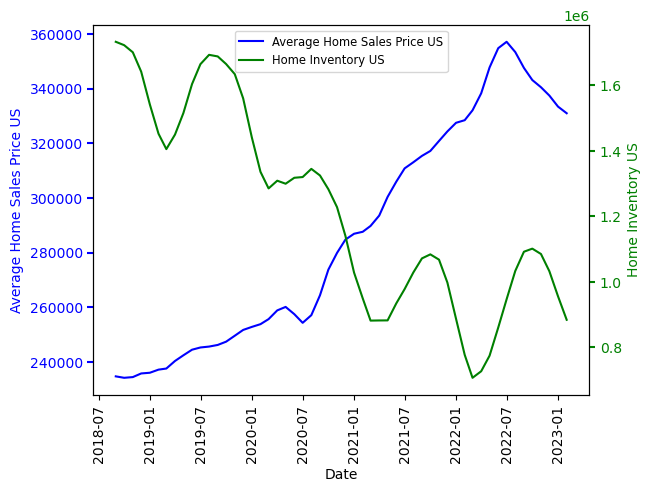

In [292]:
#plot median us sales price and home inventory multi-line plot
#set x,y values
average_sales_price_us = median_sale_price_cleaned.loc['United States']
average_sales_price_us = average_sales_price_us.astype(float)

home_inventory_us = inventory_csv_df_cleaned.loc['United States']
home_inventory_us = home_inventory_us.astype(float)

date = median_sale_price_cleaned.keys()
date_2 = pd.to_datetime(date)

#plot figure with ax subplots for multi y-axis
fig, ax = plt.subplots()
twin1 = ax.twinx()

sales_price_plot, = ax.plot(date_2, average_sales_price_us, color="blue", label="Average Home Sales Price US")
inventory_plot, = twin1.plot(date_2, home_inventory_us, color="green", label="Home Inventory US")

#set tick labels, colors, rotation
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=sales_price_plot.get_color(), **tkw)
twin1.tick_params(axis='y', colors=mortgage_rate_plot.get_color(), **tkw)

ax.yaxis.label.set_color(sales_price_plot.get_color())
twin1.yaxis.label.set_color(mortgage_rate_plot.get_color())    

#set labels
ax.set_xlabel('Date')
ax.set_ylabel('Average Home Sales Price US')
twin1.set_ylabel("Home Inventory US")

#set legend
ax.legend(handles = [sales_price_plot, inventory_plot], loc='upper center', fontsize='small')

# Save the figure
plt.savefig("AverageSalesPrice_HomeInventory.png")

#show plot
plt.show()


The r-value is:0.7528325888827002


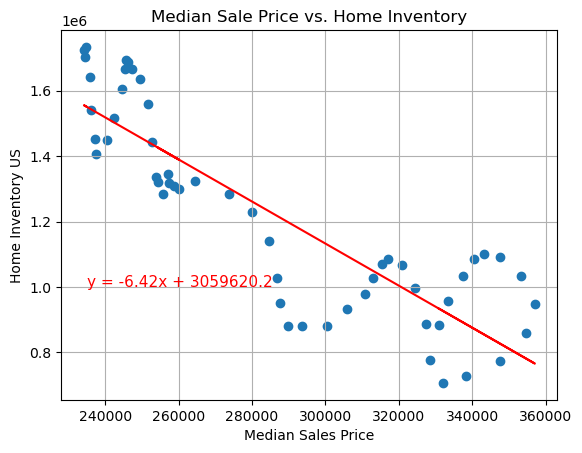

In [293]:
#scatter plot + linear regression median sales price + home inventory
x_val=median_sale_price_cleaned.loc['United States']
x_value=x_val.astype(float)

y_val=inventory_csv_df_cleaned.loc['United States']
y_value=y_val.astype(float)
# y_val=average_mortgage_rate['Average Rate']
# y_value=y_val.astype(float)

#plot data

plt.scatter(x_value, y_value)
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_value, y_value)
median_sales_price_home_inventory=x_value*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,median_sales_price_home_inventory,"r-")
plt.annotate(line_eq,(235000,1e6),fontsize=11,color="red")
plt.xlabel("Median Sales Price")
plt.ylabel("Home Inventory US")
plt.grid()
plt.title("Median Sale Price vs. Home Inventory")
print(f'The r-value is:{rvalue*rvalue}')
plt.savefig("MedianSalePricevsInventoryScatter.png")
